In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # Without this projection='3d' is not recognized


def draw_contour_2d(points):
    """Draws contour of the 2D figure based on the order of the points.

    :param points: list of numpy arrays describing nodes of the figure.
    """
    xs, ys = zip(points[-1], *points)
    plt.plot(xs, ys, color="blue")

def draw_contour_3d(points, sides):
    """Draws contour of the 3D figure based on the description of its sides.

    :param points: list of numpy arrays describing nodes of the figure.
    :param sides: list containing description of the figure's sides. Each side is described by a list of indexes of elements in points.
    """
    for side in sides:
        xs, ys, zs = [], [], []
        for s in side:
            xs.append(points[s][0])
            ys.append(points[s][1])
            zs.append(points[s][2])
        # Adding connection to the first node
        a = points[side[0]]
        xs.append(a[0])
        ys.append(a[1])
        zs.append(a[2])
        plt.plot(xs, ys, zs, color="blue")
        
def draw_triangle_simple_1():
    points = [np.array([-1, 4]),
              np.array([2, 0]),
              np.array([0, 0])]
    cc_points = convex_comb_triangle_loop(points)
    draw_convex_combination_2d(points, cc_points)
    plt.show()

def draw_triangle_simple_2():
    points = [np.array([-2, 3]),
              np.array([4, 4]),
              np.array([3, 2])]
    cc_points = convex_comb_triangle_loop(points)
    draw_convex_combination_2d(points, cc_points)
    plt.show()

def draw_triangle_1():
    points = [np.array([-1, 4]),
              np.array([2, 0]),
              np.array([0, 0])]
    cc_points = convex_comb_general(points)
    draw_convex_combination_2d(points, cc_points)
    plt.show()

def draw_triangle_2():
    points = [np.array([-2, 3]),
              np.array([4, 4]),
              np.array([3, 2])]
    cc_points = convex_comb_general(points)
    draw_convex_combination_2d(points, cc_points)
    plt.show()

def draw_rectangle():
    points = [np.array([0, 0]),
              np.array([0, 1]),
              np.array([1, 1]),
              np.array([1, 0])]
    cc_points = convex_comb_general(points)
    draw_convex_combination_2d(points, cc_points)
    plt.show()

def draw_hexagon():
    points = [np.array([1, -2]),
              np.array([-1, -2]),
              np.array([-2, 0]),
              np.array([-1, 2]),
              np.array([1, 2]),
              np.array([2, 0])]
    cc_points = convex_comb_general(points)
    draw_convex_combination_2d(points, cc_points)
    plt.show()

def draw_not_convex():
    points = [np.array([0, 0]),
              np.array([0, 2]),
              np.array([1, 1]),
              np.array([2, 3]),
              np.array([2, 0])]
    cc_points = convex_comb_general(points)
    draw_convex_combination_2d(points, cc_points)
    plt.show()

def draw_tetrahedron():
    sides = [[0,1,2], [1,2,3], [0,2,3], [0,1,3]]
    points = [np.array([1.0, 1.0, 1.0]),
              np.array([-1.0, -1.0, 1.0]),
              np.array([-1.0, 1.0, -1.0]),
              np.array([1.0, -1.0, -1.0])]
    cc_points = convex_comb_general(points, step_arange=0.1)
    draw_convex_combination_3d(points, cc_points, sides=sides, color_z=True)
    plt.show()

def draw_cube():
    sides = [[0,1,2,3], [4,5,6,7], [0,4,5,1], [2,6,7,3]]
    points = [np.array([0.0, 0.0, 0.0]),
              np.array([1.0, 0.0, 0.0]),
              np.array([1.0, 1.0, 0.0]),
              np.array([0.0, 1.0, 0.0]),
              np.array([0.0, 0.0, 1.0]),
              np.array([1.0, 0.0, 1.0]),
              np.array([1.0, 1.0, 1.0]),
              np.array([0.0, 1.0, 1.0])]
    cc_points = convex_comb_general(points, step_arange=0.2)
    draw_convex_combination_3d(points, cc_points, sides=sides, color_z=True)
    plt.show()

def draw_vector_addition_ex1():
    v = [np.array([-1, 4]),
         np.array([2, 0]),
         np.array([0, 0])]
    coeffs = [0.4, 0.3, 0.3]
    draw_convex_combination_2d(v, convex_comb_general(v))
    draw_vector_addition(v, coeffs)
    plt.show()
    coeffs = [0.2, 0.8, 0.0]
    draw_convex_combination_2d(v, convex_comb_general(v))
    draw_vector_addition(v, coeffs)
    plt.show()

## Zad. 1

In [2]:
def convex_comb_triangle_loop(points):
    """Generates all linear convex combinations of points for a triangle using loops.

    :param points: list of numpy arrays representing nodes of the figure.
    :return: list of points, each represented as np.array.
    """
    assert len(points) == 3
    
    coords = np.array(points).transpose()
    result = []
    lambda_vals = np.linspace(0, 1, 10)
    
    for lambda1 in np.linspace(0, 1, 10):
        limit = 1.0 - lambda1
        for lambda2 in np.linspace(0, limit, 10):
            limit = 1.0 - lambda1 - lambda2
            for lambda3 in np.linspace(0, limit, 10):
                if np.isclose(lambda1 + lambda2 + lambda3, 1.0):
                    l = np.array([
                        np.array([lambda1]),
                        np.array([lambda2]),
                        np.array([lambda3])
                    ])

                    result.append(np.matmul(coords, l))
                    
    return result

In [3]:
def draw_convex_combination_2d(points, cc_points):
    coords = np.array(cc_points)
#     plt.plot(coords[:,0], coords[:,1])
    plt.plot(coords[:,0], coords[:,1], "ro")
    draw_contour_2d(points)

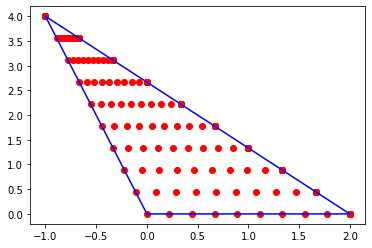

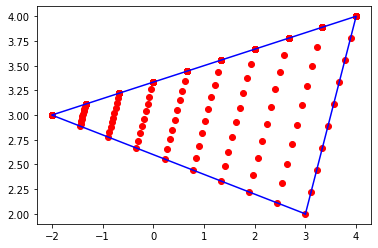

In [4]:
# punkty występują gęściej na górze z powodu zastosowania optymalizacji w pętlach (linie 14 oraz 16),
# a np.linspace generuje zawsze tyle samo wartości
draw_triangle_simple_1()
draw_triangle_simple_2()

## Zad. 2

In [5]:
def convex_comb_general_internal(depth, step_arange):
     
    if depth == 1:
        limit = 1.0 + step_arange
        return [[x] for x in np.arange(0, limit, step_arange)]
    
    result = []
    values = convex_comb_general_internal(depth-1, step_arange)
    for V in values:
        limit = 1.0 - sum(V) + step_arange
        for L in np.arange(0, limit, step_arange):
            result.append(V + [L])
            
    return result

In [6]:
def convex_comb_general(points, _=1.0, step_arange=0.1, __=""):
    """Generates all linear convex combinations of points with the specified precision.
    :param points: list of numpy arrays representing nodes of the figure.
    :param limit: value to be distributed among remaining unassigned linear coefficients.
    :param step_arange: step in arange.
    :param tabs: indent for debug printing.
    :return: list of points, each represented as np.array.
    """
    
    depth = len(points)
    lambdas = convex_comb_general_internal(depth, step_arange)
    lambdas = [L for L in lambdas if np.isclose(sum(L), 1.0)]
    
    coords = np.array(points).transpose()
    result = []
    
    for L in lambdas:
        result.append(np.matmul(coords, L))
    
    return result

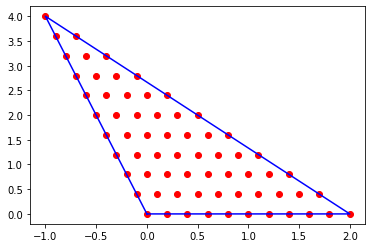

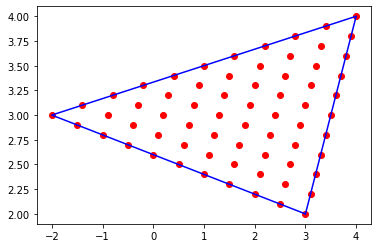

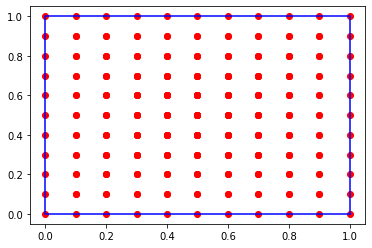

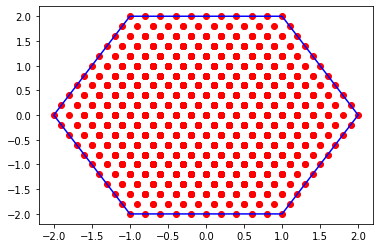

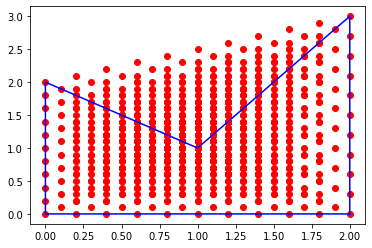

In [7]:
draw_triangle_1()
draw_triangle_2()
draw_rectangle()
draw_hexagon()
draw_not_convex()

## Zad. 3

In [8]:
from mpl_toolkits.mplot3d import Axes3D

def getColor(val):
    if val >  1.0: return "tab:blue"
    if val >  0.9: return "tab:orange"
    if val >  0.8: return "tab:green"
    if val >  0.7: return "tab:red"
    if val >  0.6: return "tab:purple"
    if val >  0.5: return "tab:brown"
    if val >  0.4: return "tab:pink"
    if val >  0.3: return "tab:gray"
    if val >  0.2: return "tab:cyan"
    if val >  0.1: return "tab:blue"
    if val >  0.0: return "tab:orange"
    if val > -0.1: return "tab:green"
    if val > -0.2: return "tab:red"
    if val > -0.3: return "tab:purple"
    if val > -0.4: return "tab:brown"
    if val > -0.5: return "tab:pink"
    if val > -0.6: return "tab:gray"
    if val > -0.7: return "tab:cyan"
    if val > -0.8: return "tab:blue"
    if val > -0.9: return "tab:orange"
    if val > -1.0: return "tab:green"
    return "tab:red"

def draw_convex_combination_3d(points, cc_points, sides=None, color_z=True):
    fig = plt.figure()
    coords = np.array(cc_points)

    ax = fig.add_subplot(111, projection='3d')

    for idx in range(0, len(coords[:])):
        ax.scatter(coords[idx,0], coords[idx,1], coords[idx, 2], c=getColor(coords[idx,2]))
        
#     ax.scatter(coords[:,0], coords[:,1], coords[:, 2])
        
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    # Drawing contour of the figure (with plt.plot).
    if sides is not None:
        draw_contour_3d(points, sides)

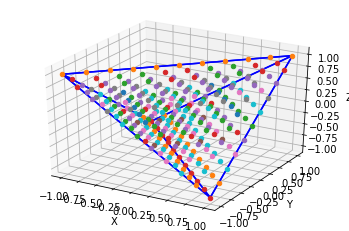

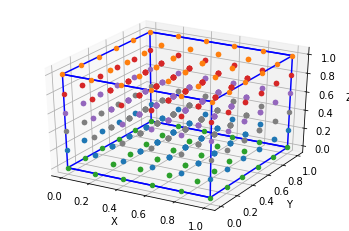

In [9]:
draw_tetrahedron()
draw_cube()

## Zad. 4

In [10]:
def draw_vector_addition(vectors, coeffs):
    start = np.array([0.0, 0.0])
    for c, v in zip(coeffs, vectors):
        assert isinstance(v, np.ndarray)
        assert isinstance(c, float)

    vectors_2 = [c * v for c, v in zip(coeffs, vectors)]
    resultant_vector = sum(vectors_2)
    plt.arrow(0.0, 0.0, resultant_vector[0], resultant_vector[1], head_width=0.1, head_length=0.1, color="magenta", zorder=4, length_includes_head=True)

    x = y = 0
    for a,b in vectors_2:
        plt.arrow(x, y, a, b, head_width=0.1, head_length=0.1, color="green", zorder=4, length_includes_head=True)
        x,y = a, b
        
    plt.margins(0.05)


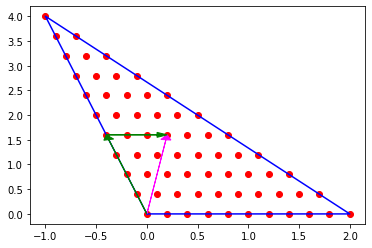

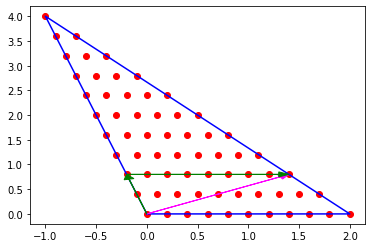

In [11]:
draw_vector_addition_ex1()